<a href="https://colab.research.google.com/github/joe94113/Deep-Learning-course/blob/main/%E9%81%B7%E7%A7%BB%E5%AD%B8%E7%BF%92TransferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import glob
import pandas as pd
paths = glob.glob("train/cat.*.jpg")
catdf = pd.DataFrame(columns=["path", "target"])
catdf["path"] = paths
catdf["target"] = 0
paths = glob.glob("train/dog.*.jpg")
dogdf = pd.DataFrame(columns=["path", "target"])
dogdf["path"] = paths
dogdf["target"] = 1
traindf = pd.concat([catdf, dogdf], ignore_index=True) # 融合，丟棄原有index
traindf

,path,target
0,train/cat.261.jpg,0
1,train/cat.286.jpg,0
2,train/cat.16.jpg,0
3,train/cat.257.jpg,0
4,train/cat.295.jpg,0
...,...,...
192,train/dog.12256.jpg,1
193,train/dog.24.jpg,1
194,train/dog.12242.jpg,1
195,train/dog.21.jpg,1


遷移學習，就像移植別人的眼睛，但mlp是自己的會有排斥性，要降低排斥性，就是重新把CNN的輸出調整到MLP可以接受的輸入，深度學習重要技法，Batch Normalization(批標準化)

Batch Normalization(批標準化)
對整個批次輸入取平均和標準差，調到更合理的範圍跟平均跟標準差，但不知道平均跟標準差，隨便給然後用梯度下降來調到對

輸出層如果只有一個函數，可以選用sigmoid函數

輸出層，如果有兩個以上輸出神經，請選用softmax函數

如果是中間層，只有一種選擇relu函數

In [ ]:
# 建立模型
from keras.applications.vgg16 import VGG16 # 匯入模型(眼睛)
from keras.models import Model
from keras.layers import Dense, Flatten, Dropout
from keras.layers import BatchNormalization # 批次標準化
# 移植眼睛VGG16
vgg = VGG16(include_top=False, input_shape=(224,224,3))
for l in vgg.layers: # 把每一層當list列出來
  l.trainable=False # trainable要在comple前完成

x = BatchNormalization()(vgg.output)
x = Flatten()(x) # 攤開
x = Dense(2048, activation="relu")(x) # 神經網路
x = Dropout(0.25)(x) # 忘掉某些神經，防止過擬合
x = Dense(256, activation="relu")(x) # 神經網路
x = Dropout(0.25)(x) # 忘掉某些神經，防止過擬合
x = Dense(2, activation="softmax")(x) # 神經網路
cnn = Model(inputs=vgg.input, outputs=x)
cnn.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

輸出一個神經元選擇:binary_crossentropy，多個神經元選擇categorical_crossentropy
adam小彈珠優化法，無腦選

In [ ]:
# 確定模型
cnn.compile(loss="categorical_crossentropy",
      optimizer="adam",
      metrics=['accuracy'])

In [ ]:
# numpy array
import numpy as np
# scilit-learn
from sklearn.model_selection import train_test_split # 切成訓練及測試資料
x = np.array(traindf['path']) # 題目
y = np.array(traindf['target']) # 答案
# [90%x, 10%x, 90%y, 10%y]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1) # 一成當測試資料

In [ ]:
from keras.utils.np_utils import to_categorical # one-hot encoding
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [ ]:
# 背後使用 PIL: 全名Pillow 
from keras.preprocessing.image import load_img # 可以把路徑轉成圖片
from keras.applications.vgg16 import preprocess_input # 偷模型不要自行處理，都使用那個模型的處理方式
img = load_img(x_train[0], target_size=(224,224,3)) # 把路徑變圖片
preprocess_input(np.array(img)) # 轉換成array才能丟進去preprocess_input

array([[[  53.060997,   33.221   ,   23.32    ],
        [  67.061   ,   47.221   ,   37.32    ],
        [  67.061   ,   47.221   ,   37.32    ],
        ...,
        [  92.061   ,   77.221   ,   70.32    ],
        [  92.061   ,   77.221   ,   70.32    ],
        [  91.061   ,   76.221   ,   69.32    ]],

       [[  51.060997,   31.221   ,   21.32    ],
        [  66.061   ,   46.221   ,   36.32    ],
        [  66.061   ,   46.221   ,   36.32    ],
        ...,
        [  93.061   ,   78.221   ,   71.32    ],
        [  93.061   ,   78.221   ,   71.32    ],
        [  92.061   ,   77.221   ,   70.32    ]],

       [[  51.060997,   31.221   ,   21.32    ],
        [  66.061   ,   46.221   ,   36.32    ],
        [  66.061   ,   46.221   ,   36.32    ],
        ...,
        [  93.061   ,   78.221   ,   71.32    ],
        [  93.061   ,   78.221   ,   71.32    ],
        [  92.061   ,   77.221   ,   70.32    ]],

       ...,

       [[ -77.939   ,  -92.779   , -107.68    ],
        [ -

In [ ]:
batch = 10 #看兩百筆資料做梯度下降
train = 5
for i in range(train):
  img_list = []
  idx = np.random.randint(0, x_train.shape[0], batch)
  for fp in x_train[idx]:
    img = load_img(fp, target_size=(224,224,3))
    img_pre = preprocess_input(np.array(img))
    img_list.append(img_pre)
  x_train_np = np.array(img_list)
  y_train_np = np.array(y_train_cat[idx])
  result = cnn.train_on_batch(x_train_np, y_train_np)
  print("-" * 15, i, "-" * 15)
  print(result)

--------------- 0 ---------------
[1.2116775512695312, 0.6000000238418579]
--------------- 1 ---------------
[0.04703501611948013, 1.0]
--------------- 2 ---------------
[1.3295167684555054, 0.800000011920929]
--------------- 3 ---------------
[10.003293991088867, 0.4000000059604645]
--------------- 4 ---------------
[0.9701659083366394, 0.8999999761581421]


如果發現答案都偏向一個答案，代表神經元可能死去

In [ ]:
batch = 200 # 200比驗證
test_img_list = []
test_img_list_ori = []
idx = np.random.randint(0, x_test.shape[0], batch)
for fp in x_test[idx]:
  img = load_img(fp, target_size=(224,224,3))
  test_img_list_ori.append(np.array(img))
  img_pre = preprocess_input(np.array(img))
  test_img_list.append(img_pre)
x_test_np = np.array(test_img_list)
y_test_np = np.array(y_test_cat[idx])
y_test_ori = y_test[idx]
# cnn.predict(x_test_np) # model式模型不能predict_classes，Sequential才可
cnn.evaluate(x_test_np, y_test_np) # 返回的是损失值和你选定的指标值（例如，精度accuracy）

7/7 [==============================] - 99s 14s/step - loss: 32.6321 - accuracy: 0.5300


[32.632102966308594, 0.5299999713897705]

In [ ]:
pre = cnn.predict(x_test_np)
pre

array([[0.0000000e+00, 1.0000000e+00],
       [3.0940629e-07, 9.9999964e-01],
       [0.0000000e+00, 1.0000000e+00],
       [9.6368486e-01, 3.6315173e-02],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [5.1660891e-24, 1.0000000e+00],
       [9.6368486e-01, 3.6315173e-02],
       [0.0000000e+00, 1.0000000e+00],
       [1.9145480e-25, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [3.4385610e-17, 1.0000000e+00],
       [3.4385610e-17, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [3.8657607e-21, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [3.4385610e-17, 1.0000000e+00],
       [3.8657607e-21, 1.0000000e+00],
       [9.6368486e-01, 3.6315173e-02],
       [0.0000000e+00, 1.0000000e+00],
       [1.7962696e-31, 1.0000000e+00],
       [3.8657607e-21, 1.0000000e+00],
       [1.1094191e-37, 1.0000000e+00],
       [1.1094191e-37, 1.0000000e+00],
       [3.8657607e-21, 1.

到底有幾個錯誤: 94


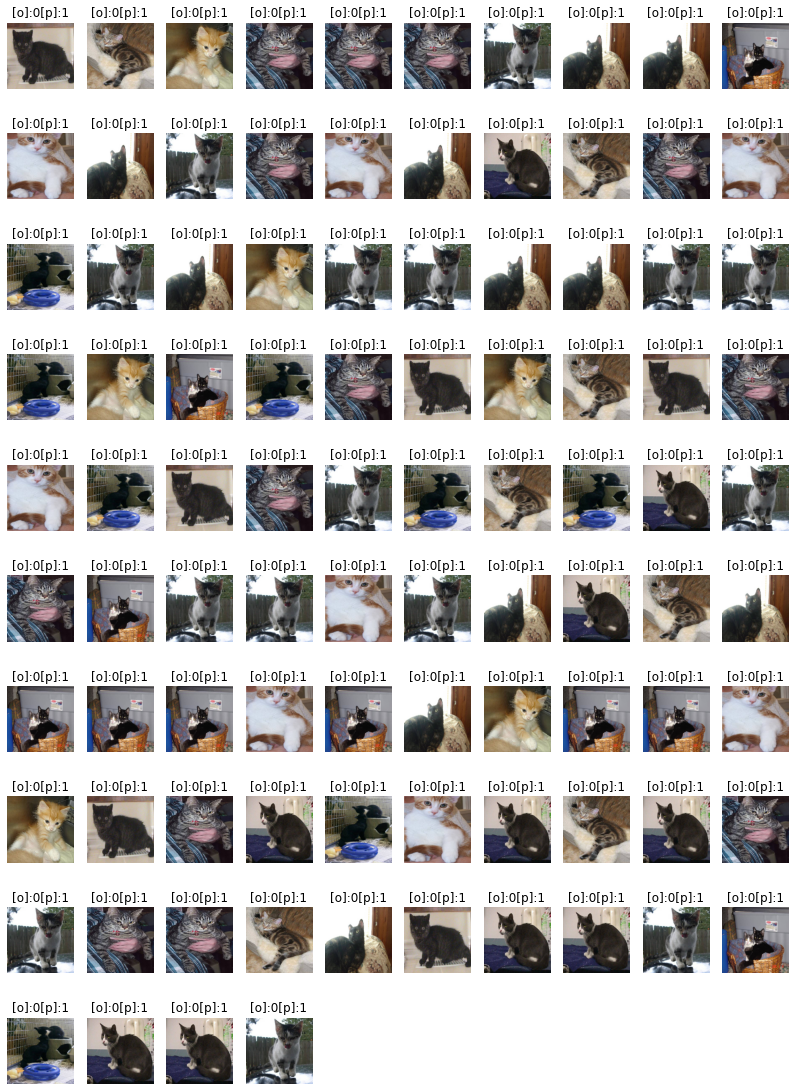

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
pre_ori = pre.argmax(axis=-1) # 沿軸axis最大值的索引值
test_img_list_ori = np.array(test_img_list_ori)
y_test_ori = np.array(y_test_ori)
false_index = np.nonzero(pre_ori != y_test_ori)[0] # 找出判斷錯誤位置
print("到底有幾個錯誤:", len(false_index))
false_img = test_img_list_ori[false_index]
ori_label = y_test_ori[false_index]
pre_label = pre_ori[false_index]

width = 10
height = int(len(false_index) / 10) + 1
plt.figure(figsize=(14, 20)) # 寬14英寸，高40
# 查看哪些錯了，o:答案，p:預測失敗
for (index, img) in enumerate(false_img):
  plt.subplot(height, width, index+1)
  msg = "[o]:" + str(ori_label[index]) + "[p]:" + str(pre_label[index])
  plt.title(msg)
  plt.axis("off") # 不顯示軸線
  plt.imshow(img)